In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [ ]:
df = pd.read_csv('data_A.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [ ]:
df.drop(columns=['id','Surname','Unnamed: 0', 'CustomerId'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

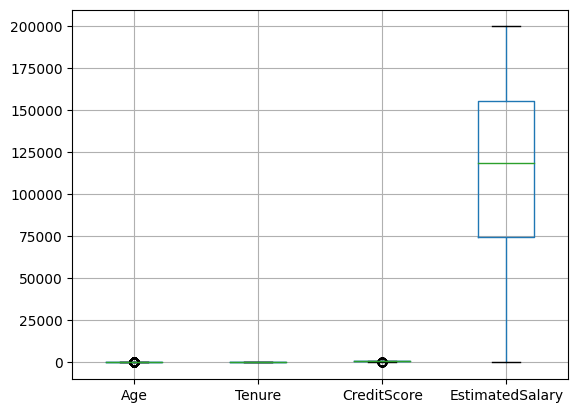

In [ ]:
boxplot = df.boxplot(column=['Age','Tenure','CreditScore','EstimatedSalary'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [ ]:
input_df=df.drop('churn',axis=1)
output_df=df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_df,output_df, test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32990, 10)
(32990,)
(8248, 10)
(8248,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

Gender_train=x_train[['Gender']]
Geo_train=x_train[['Geography']]

Gender_test=x_test[['Gender']]
Geo_test=x_test[['Geography']]

Gender_encode=OneHotEncoder()
Geo_encode=OneHotEncoder()

Gender_train=pd.DataFrame(Gender_encode.fit_transform(Gender_train).toarray(),columns=Gender_encode.get_feature_names_out())
Geo_train=pd.DataFrame(Geo_encode.fit_transform(Geo_train).toarray(),columns=Geo_encode.get_feature_names_out())

Gender_test=pd.DataFrame(Gender_encode.transform(Gender_test).toarray(),columns=Gender_encode.get_feature_names_out())
Geo_test=pd.DataFrame(Geo_encode.transform(Geo_test).toarray(),columns=Geo_encode.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

X_Train=pd.concat([x_train,Gender_train,Geo_train], axis=1)
X_Test=pd.concat([x_test,Gender_test,Geo_test], axis=1)

In [ ]:
Gender_encode.get_feature_names_out()

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [ ]:
Geo_encode.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [ ]:
filename_gen = 'OneHot_Gender.pkl'
pkl.dump(Gender_encode,open(filename_gen,'wb'))

filename_geo = 'OneHot_Geo.pkl'
pkl.dump(Geo_encode,open(filename_geo,'wb'))

In [ ]:
X_Train.columns

Index(['index', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
X_Train=X_Train.drop(['index','Gender','Geography'],axis=1)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_Class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_Class.fit(X_Train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
X_Test.columns

Index(['index', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
X_Test=X_Test.drop(['index','Gender','Geography'],axis=1)

In [ ]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8248 non-null   float64
 1   Age                8248 non-null   float64
 2   Tenure             8248 non-null   int64  
 3   Balance            8248 non-null   float64
 4   NumOfProducts      8248 non-null   int64  
 5   HasCrCard          8248 non-null   int64  
 6   IsActiveMember     8248 non-null   int64  
 7   EstimatedSalary    8248 non-null   float64
 8   Gender_Female      8248 non-null   float64
 9   Gender_Male        8248 non-null   float64
 10  Geography_France   8248 non-null   float64
 11  Geography_Germany  8248 non-null   float64
 12  Geography_Spain    8248 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 837.8 KB


In [ ]:
y_predict =  RF_Class.predict(X_Test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6547
           1       0.83      0.29      0.43      1701

    accuracy                           0.84      8248
   macro avg       0.83      0.64      0.67      8248
weighted avg       0.84      0.84      0.81      8248



In [ ]:
filename_model='RF_churn.pkl'
pkl.dump(RF_Class,open(filename_model,'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_RF = accuracy_score(y_test, y_predict)
print("Random Forest Accuracy:", accuracy_RF)

Random Forest Accuracy: 0.8408098933074685


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[2,4,6]
}

In [ ]:
RF_Class2 = RandomForestClassifier()
RF_Class2 = GridSearchCV(RF_Class2,
                              param_grid = parameters,
                              scoring ='accuracy',
                              cv=5)

In [ ]:
RF_Class2.fit(X_Train,y_train)
print("Tuned Hyperparameters:", RF_Class2.best_params_)
print("Accuracy:",RF_Class2.best_score_)

Tuned Hyperparameters: {'criterion': 'gini', 'max_depth': 6}
Accuracy: 0.8538344953016066


In [ ]:
RF_class_best = RandomForestClassifier(criterion='gini',max_depth=6)

In [ ]:
RF_class_best.fit(X_Train,y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_predict_best=RF_class_best.predict(X_Test)

In [ ]:
print("\nClassification Report\n")
print(classification_report(y_test,y_predict,target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6547
           1       0.83      0.29      0.43      1701

    accuracy                           0.84      8248
   macro avg       0.83      0.64      0.67      8248
weighted avg       0.84      0.84      0.81      8248



XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGB = XGBClassifier(n_estimators=150,max_depth=7,learning_rate=0.1,gamma=0.4, colsample_bytree=0.8)
XGB.fit(X_Train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGB.predict(X_Test)

In [ ]:
accuracy_XGB = accuracy_score(y_test, y_pred)
print(accuracy_XGB)

0.8629970902036858


In [ ]:
print("\nClassification Report\n")
print(classification_report(y_test, y_pred, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6547
           1       0.73      0.54      0.62      1701

    accuracy                           0.86      8248
   macro avg       0.81      0.74      0.77      8248
weighted avg       0.85      0.86      0.86      8248



In [ ]:
print("Random Forest Accuracy:", accuracy_RF)
print("Random Forest Tuning Accuracy:", RF_Class2.best_score_)
print("XGBoost Accuracy:", accuracy_XGB)

Random Forest Accuracy: 0.8408098933074685
Random Forest Tuning Accuracy: 0.8538344953016066
XGBoost Accuracy: 0.8629970902036858


In [ ]:
filename_best='XGBOOST.pkl'
pkl.dump(XGB,open(filename_best,'wb'))

In [ ]:
Load_model = pkl.load(open(filename_best, 'rb'))
result = Load_model.score(X_Train, y_train)
print(result)

0.894846923310094
